  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=3e641f0594c08bac232a664f3225981fae3bb4dcde2e119b8a5c159e4165e5a4
  Stored in directory: /home/nikhil/.cache/pip/wheels/4b/a5/2d/4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


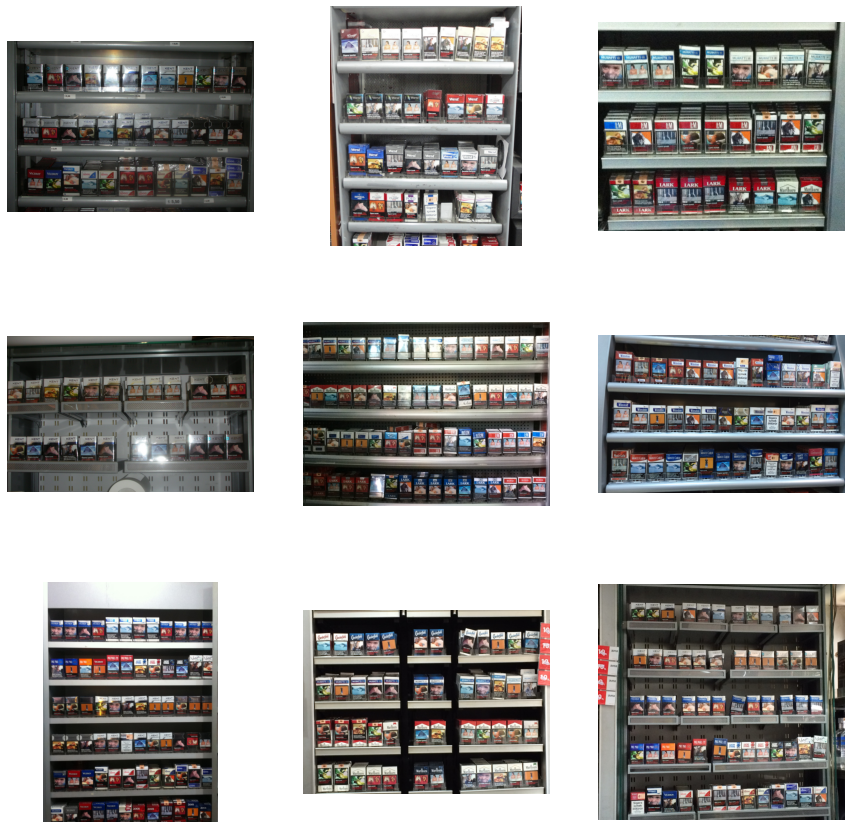

In [2]:
!pip3 install imutils

from imutils import paths
import matplotlib.pyplot as plt

train_images = list(paths.list_images("ShelfImages/train"))
plt.figure(figsize=(15, 15))
for i, image  in enumerate(train_images[:9]):
    image = plt.imread(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")

In [7]:
import pandas as pd
import numpy as np 


df = pd.read_csv("https://raw.githubusercontent.com/gulvarol/grocerydataset/master/annotations.csv",
                 names=["img", "x", "y", "w", "h", "class"])
print(df.head())
print(df.info())
print(df.describe())




                  img     x     y     w     h  class
0  C1_P01_N1_S2_1.JPG  1008  1552  1260  1928      0
1  C1_P01_N1_S2_1.JPG  1028   928  1280  1304      0
2  C1_P01_N1_S2_1.JPG    24   872   268  1264      0
3  C1_P01_N1_S2_1.JPG   280  1568   532  1944      0
4  C1_P01_N1_S2_1.JPG   292   872   544  1248      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     13184 non-null  object
 1   x       13184 non-null  int64 
 2   y       13184 non-null  int64 
 3   w       13184 non-null  int64 
 4   h       13184 non-null  int64 
 5   class   13184 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 618.1+ KB
None
                  x             y             w             h         class
count  13184.000000  13184.000000  13184.000000  13184.000000  13184.000000
mean    1315.445995    941.244539   1516.799075   1250.232858      0.837985
s

In [ ]:
import cv2
id = 1
im = df.img[id]

im_df = df[df["img"]==im]
bbox_ls = []


image = cv2.imread("ShelfImages/train/"+im)
print(image.shape)
for i in range(len(im_df["img"])):
  [x,y,X,Y] = im_df.x[i], im_df.y[i], im_df.w[i], im_df.h[i]
  cv2.rectangle(image,(x,y),(X,Y),(0,255,255),2)

plt.figure(figsize=(15,9))
plt.imshow(image)
plt.show()

<AxesSubplot:>

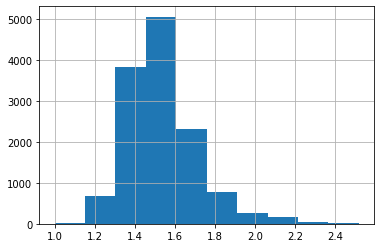

In [5]:
# bounding box analysis

aspect_ratio_x = df["w"]-df["x"]
aspect_ratio_y = df["h"]-df["y"]

aspect_ratio = aspect_ratio_y/aspect_ratio_x
aspect_ratio.hist()